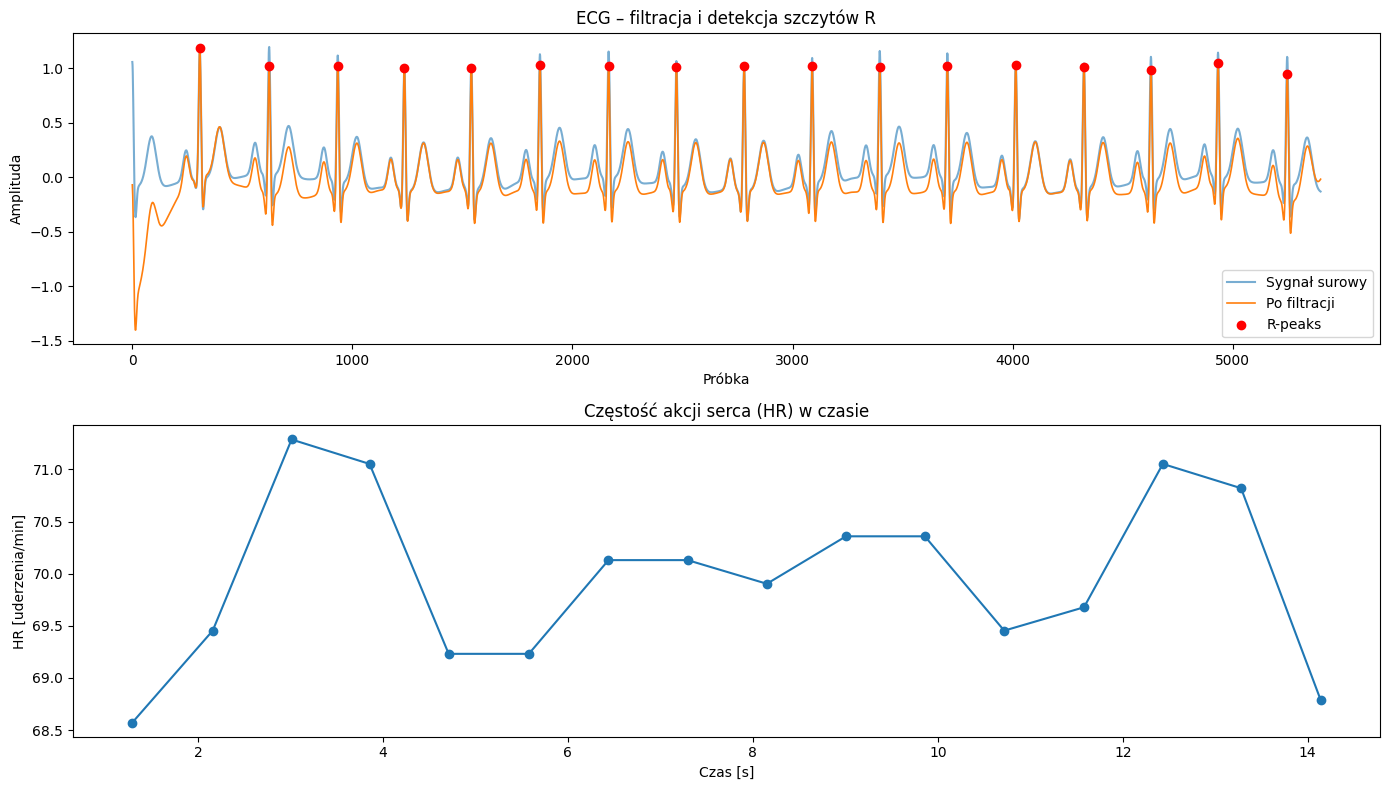

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Parametry
duration = 15
fs       = 360
lowcut   = 0.5
highcut  = 45.0

# 1. Symulacja ECG
ecg = nk.ecg_simulate(duration=duration, sampling_rate=fs)

# 2. Filtracja pasmowa
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, lowcut, highcut, fs)

# 3. Detekcja szczytów R
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

# 4. Obliczanie HR „ręcznie”
times      = r_peaks / fs
intervals  = np.diff(times)
heart_rate = 60.0 / intervals
hr_times   = (times[:-1] + times[1:]) / 2.0

# 5. Wizualizacje
plt.figure(figsize=(14, 8))

plt.subplot(2,1,1)
plt.plot(ecg, label='Sygnał surowy', alpha=0.6)
plt.plot(filtered_ecg, label='Po filtracji', linewidth=1.2)
plt.scatter(r_peaks, filtered_ecg[r_peaks], c='red', label='R-peaks', zorder=5)
plt.legend()
plt.title("ECG – filtracja i detekcja szczytów R")
plt.xlabel("Próbka")
plt.ylabel("Amplituda")

plt.subplot(2,1,2)
plt.plot(hr_times, heart_rate, marker='o')
plt.title("Częstość akcji serca (HR) w czasie")
plt.xlabel("Czas [s]")
plt.ylabel("HR [uderzenia/min]")

plt.tight_layout()
plt.show()
